# Compare task vs rest adjusted rand index

In [2]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.similarity_colormap as sc
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from scipy import stats
import glob
import numpy as np




/Users/callithrix/Documents/Projects/Functional_Fusion/code/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
files = sorted(
    glob.glob(f'{ut.model_dir}//Models/Evaluation/nettekoven_68/ARI_*'))

list_of_dfs = []
for f, file in enumerate(files):
    t = pd.read_csv(file, delimiter='\t')
    list_of_dfs.append(t)
    t['source'] = file.split('/')[-1].strip('.tsv')

D = pd.concat(list_of_dfs, ignore_index=True).reset_index(drop=True)
D.drop_duplicates(subset=D.columns.difference(['source']))


# Symmetric / Asymmetric indicator
for r, row in D.iterrows():
    if 'sym' in row['source']:
        D.loc[r, 'symmetry'] = 'symmetric'
    else:
        D.loc[r, 'symmetry'] = 'asymmetric'



In [4]:
# Get the ARI values for each model into a dataframe
ARI = pd.DataFrame()
all_datasets = [D.train_data_a.tolist() + D.train_data_b.tolist()]
# get unique datasets
all_datasets = list(set([item for sublist in all_datasets for item in sublist]))

for dset in all_datasets:
    rows = D[(D.train_data_a == dset) | (D.train_data_b == dset)]
    for row in rows.iterrows():
        train_data_comp = [train_data for train_data in [
            row[1].train_data_a, row[1].train_data_b] if train_data != dset][0]
        res = pd.DataFrame({
            'train_data':dset,
            'train_data_comp': train_data_comp,
            'ARI':1-row[1].ari,
            'symmetry':row[1].symmetry,
            'source':row[1].source,
            'K':row[1].K,
            },
            index=[0])
        if len(dset.split(' ')) == 1:
            res['train_type'] = 'indiv'
        else:
            res['train_type'] = 'all'
        
        if len(train_data_comp.split(' ')) == 7:
             res['train_data_comp'] = 'task'
        elif len(train_data_comp.split(' ')) == 8:
            res['train_data_comp'] = 'task_and_rest'

        if len(dset.split(' ')) == 7:
            res['train_data'] = 'task'
        elif len(dset.split(' ')) == 8:
            res['train_data'] = 'task_and_rest'

        ARI = pd.concat([ARI, res], ignore_index=True)






In [5]:
ARI.head()

,train_data,train_data_comp,ARI,symmetry,source,K,train_type
0,['IBC'],task,0.395843,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_task,10,indiv
1,['IBC'],task_and_rest,0.289655,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,indiv
2,['IBC'],['MDTB'],0.274245,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,indiv
3,['IBC'],['Pontine'],0.225031,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,indiv
4,['IBC'],['Nishimoto'],0.317046,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,indiv


In [6]:
figsize = (10, 10)
crits = ['dcbc_group', 'dcbc_indiv']


In [7]:
ARI

,train_data,train_data_comp,ARI,symmetry,source,K,train_type
0,['IBC'],task,0.395843,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_task,10,indiv
1,['IBC'],task_and_rest,0.289655,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,indiv
2,['IBC'],['MDTB'],0.274245,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,indiv
3,['IBC'],['Pontine'],0.225031,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,indiv
4,['IBC'],['Nishimoto'],0.317046,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-10_taskall,10,indiv
...,...,...,...,...,...,...,...
435,['HCP'],['Nishimoto'],0.179356,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-68_taskall,68,indiv
436,['HCP'],['IBC'],0.132661,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-68_taskall,68,indiv
437,['HCP'],['WMFS'],0.140121,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-68_taskall,68,indiv
438,['HCP'],['Demand'],0.160223,symmetric,ARI_sym_indiv-all_space-MNISymC3_K-68_taskall,68,indiv


In [8]:
# train_data_comp = [train_data for train_data in [
#     row.train_data_a, row.train_data_b] if train_data != dset][0]
type(dset)
row[1]


model_name_a                                             sym_So
model_name_b                                             sym_Hc
atlas                                                  MNISymC3
K                                                            68
train_data_a                                    ['Somatotopic']
train_data_b                                            ['HCP']
train_loglik_a                                    -101838.21875
train_loglik_b                                      130507368.0
ari                                                     0.89946
source            ARI_sym_indiv-all_space-MNISymC3_K-68_taskall
symmetry                                              symmetric
Name: 219, dtype: object

<Figure size 1000x1000 with 0 Axes>

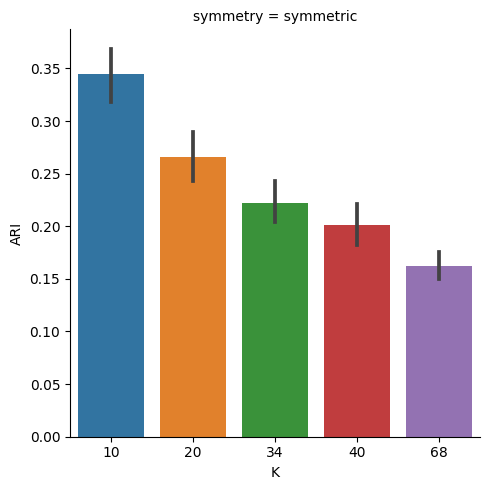

In [325]:

plt.figure(figsize=figsize)
sb.catplot(
    data=ARI, x="K", y="ARI", col="symmetry", kind="bar")



[Text(0, 0, 'task'), Text(1, 0, 'task_and_rest'), Text(2, 0, "['MDTB']"), Text(3, 0, "['Pontine']"), Text(4, 0, "['Nishimoto']"), Text(5, 0, "['IBC']"), Text(6, 0, "['WMFS']"), Text(7, 0, "['Somatotopic']"), Text(8, 0, "['HCP']"), Text(9, 0, "['Demand']")]


<Figure size 1000x4000 with 0 Axes>

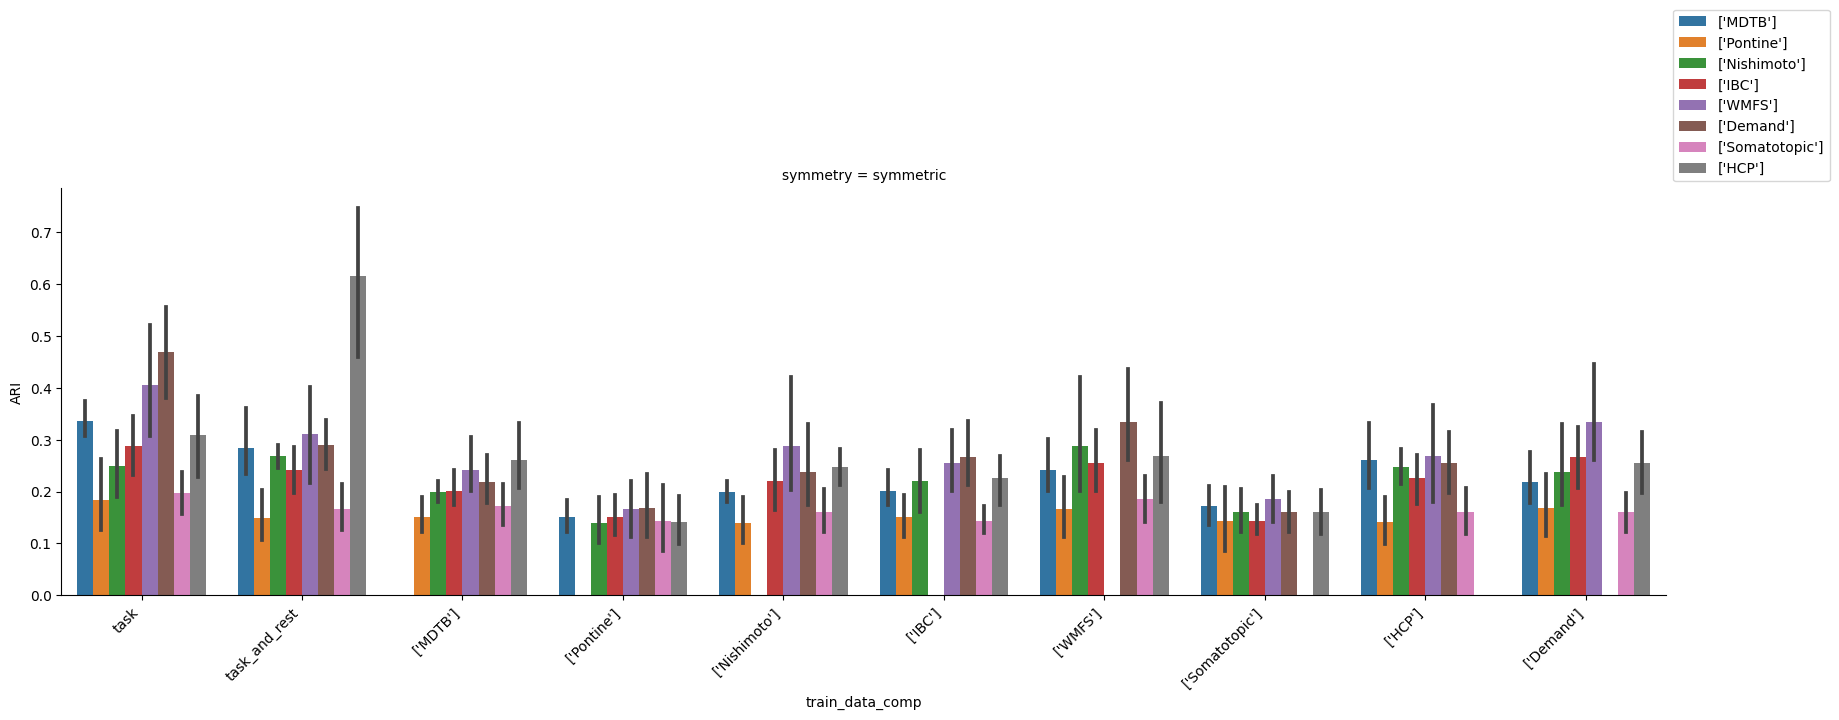

In [331]:
figsize = (10, 40)

plt.figure(figsize=figsize)
g = sb.catplot(
    data=ARI[ARI.train_type == 'indiv'], x="train_data_comp", y="ARI", col="symmetry", hue="train_data", kind="bar", legend=False, hue_order = ["['MDTB']", "['Pontine']", "['Nishimoto']", "['IBC']", "['WMFS']", "['Demand']", "['Somatotopic']", "['HCP']"])
# plt.rcParams['figure.figsize'] = figsize
g.fig.set_size_inches(20, 5)



# Make xtick labels more readable
for ax in plt.gcf().axes:
    xticklabels = ax.get_xticklabels()
    labels = [x.get_text() for x in xticklabels]    

    ax.set_xticklabels(labels, rotation=45, horizontalalignment='right')

# Move legend outside of plot
plt.legend(loc='lower left', bbox_to_anchor=(1, 1))

print(xticklabels)




[Text(0, 0, 'task'), Text(1, 0, 'task_and_rest'), Text(2, 0, "['MDTB']"), Text(3, 0, "['Pontine']"), Text(4, 0, "['Nishimoto']"), Text(5, 0, "['IBC']"), Text(6, 0, "['WMFS']"), Text(7, 0, "['Somatotopic']"), Text(8, 0, "['HCP']"), Text(9, 0, "['Demand']")]


<Figure size 1000x4000 with 0 Axes>

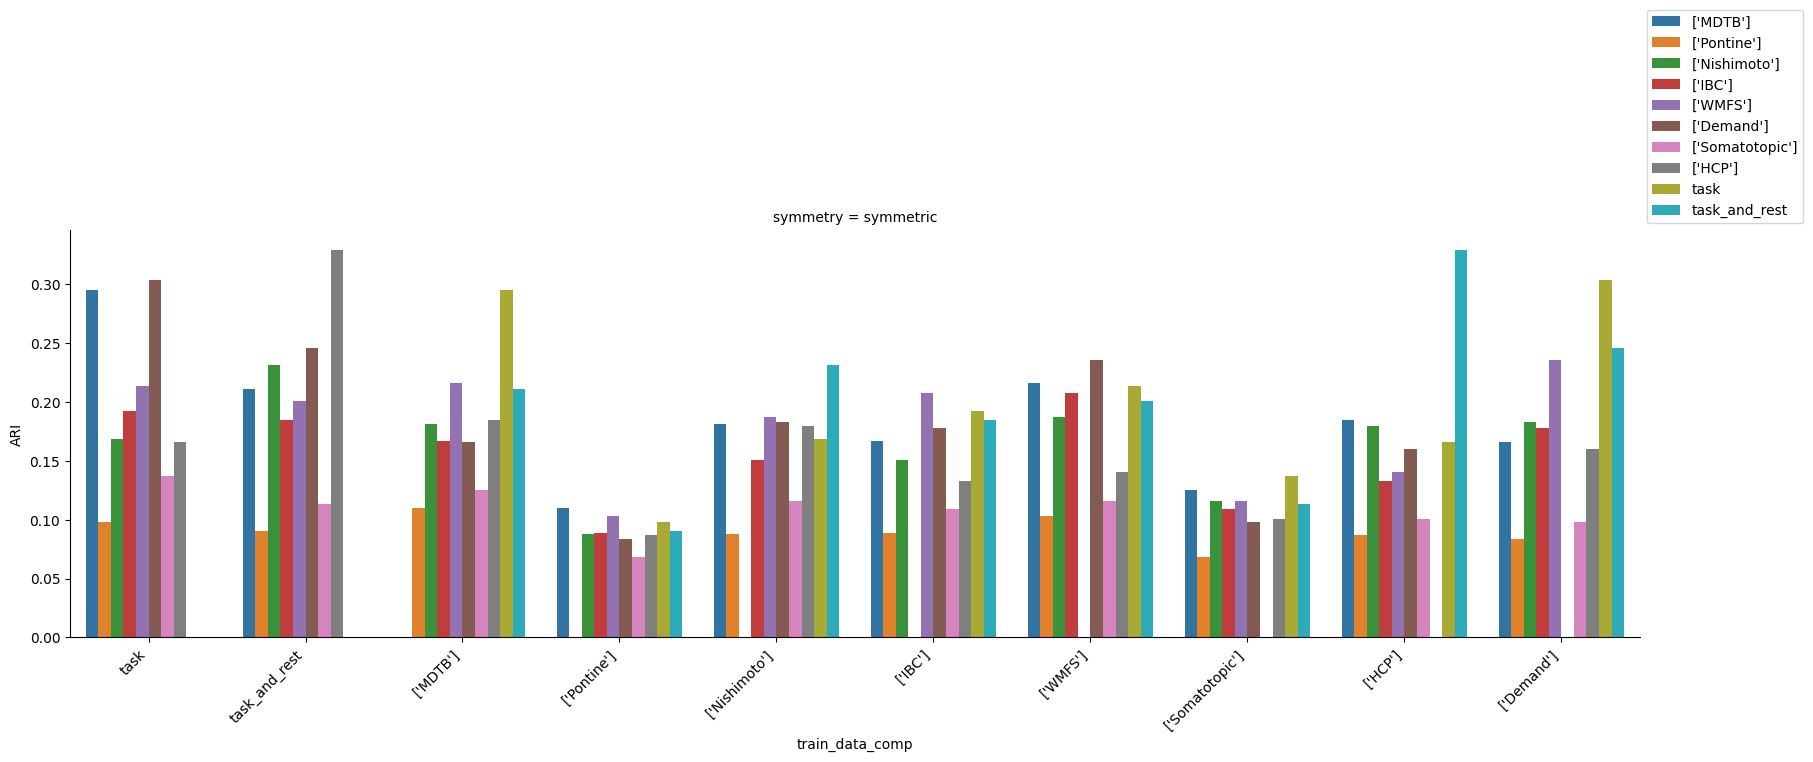

In [333]:
figsize = (10, 40)

plt.figure(figsize=figsize)
g = sb.catplot(
    data=ARI[(ARI.K == 68)], x="train_data_comp", y="ARI", col="symmetry", hue="train_data", kind="bar", legend=False, hue_order=["['MDTB']", "['Pontine']", "['Nishimoto']", "['IBC']", "['WMFS']", "['Demand']", "['Somatotopic']", "['HCP']", 'task', 'task_and_rest'])
# plt.rcParams['figure.figsize'] = figsize
g.fig.set_size_inches(20, 5)


# Make xtick labels more readable
for ax in plt.gcf().axes:
    xticklabels = ax.get_xticklabels()
    labels = [x.get_text() for x in xticklabels]

    ax.set_xticklabels(labels, rotation=45, horizontalalignment='right')

# Move legend outside of plot
plt.legend(loc='lower left', bbox_to_anchor=(1, 1))

print(xticklabels)


<Figure size 1000x4000 with 0 Axes>

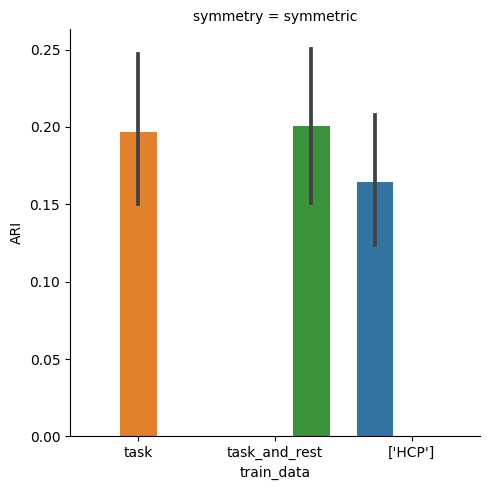

In [10]:
# Only show task, task_and_rest, and HCP for the 68 model collapsed across train_data_comp
figsize = (10, 40)
ARI_68 = ARI[(ARI.K == 68) & (ARI.train_data.isin(
    ['task', 'task_and_rest', "['HCP']"]))]
plt.figure(figsize=figsize)
g = sb.catplot(data=ARI_68, x="train_data", y="ARI", col="symmetry", hue="train_data",
               kind="bar", legend=False, hue_order=["['HCP']", 'task', 'task_and_rest'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0, 0, 'task'), Text(1, 0, 'task_and_rest'), Text(2, 0, "['MDTB']"), Text(3, 0, "['Pontine']"), Text(4, 0, "['Nishimoto']"), Text(5, 0, "['IBC']"), Text(6, 0, "['WMFS']"), Text(7, 0, "['Somatotopic']"), Text(8, 0, "['HCP']"), Text(9, 0, "['Demand']")]


<Figure size 1000x4000 with 0 Axes>

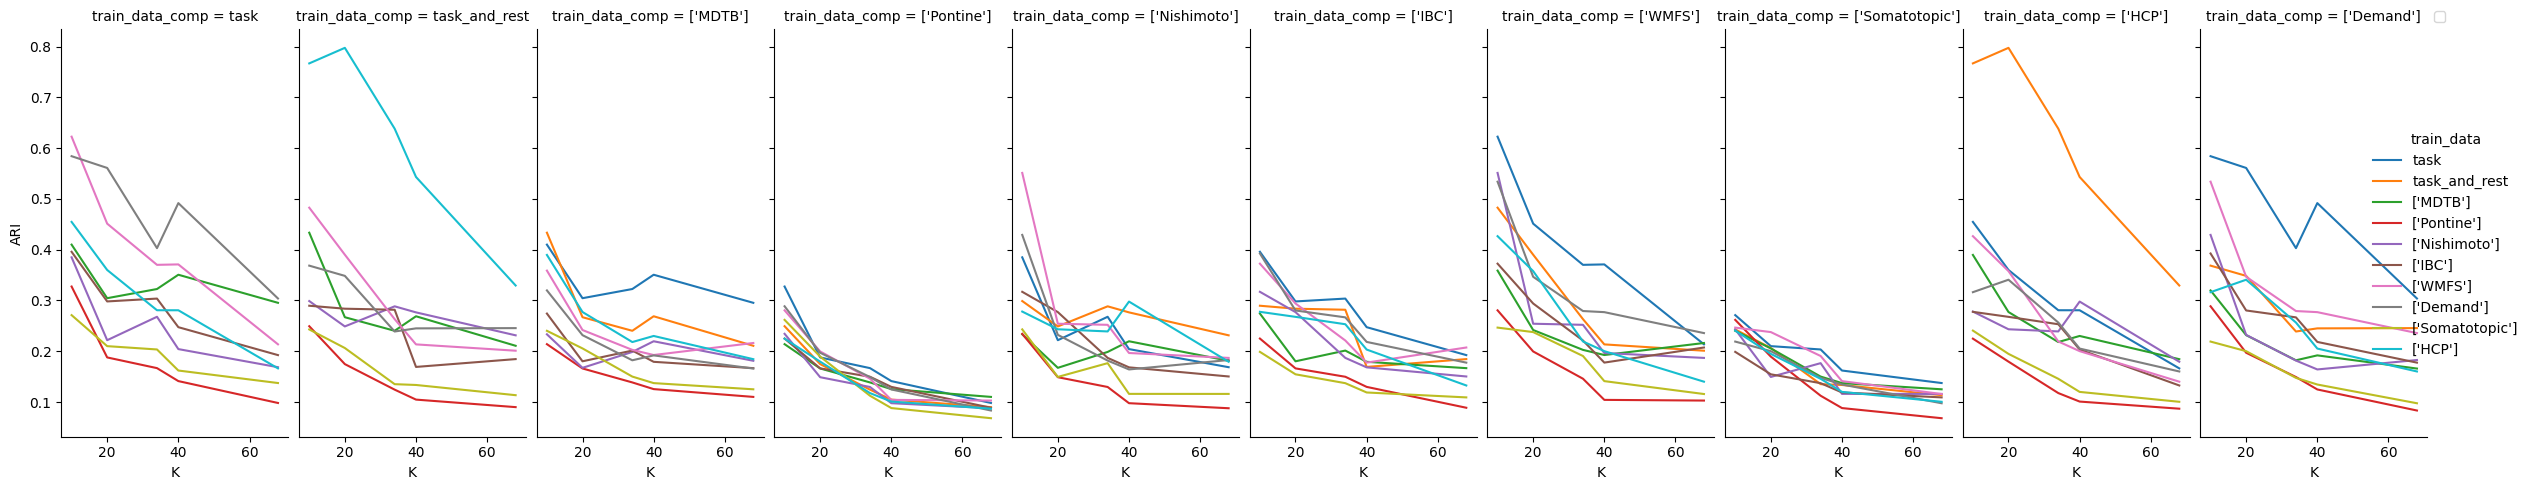

In [332]:
figsize = (10, 40)

plt.figure(figsize=figsize)
g = sb.relplot(
    data=ARI, x="K", y="ARI", col="train_data_comp", hue="train_data", kind="line", legend=True, hue_order=["['MDTB']", "['Pontine']", "['Nishimoto']", "['IBC']", "['WMFS']", "['Demand']", "['Somatotopic']", "['HCP']", 'task', 'task_and_rest'])
# plt.rcParams['figure.figsize'] = figsize
g.fig.set_size_inches(25, 5)


# # Make xtick labels more readable
# for ax in plt.gcf().axes:
#     xticklabels = ax.get_xticklabels()
#     # xticklabels = [x.get_text() for x in xticklabels]

#     # Replace labels with shorter names
#     labels = []
#     for x in xticklabels:
#         label = x.get_text()
#         if len(label.split(' ')) == 7:
#             label = 'task'
#         elif len(label.split(' ')) == 8:
#             label = 'task_and_rest'

#         labels.append(label)

#     ax.set_xticklabels(labels, rotation=45, horizontalalignment='right')

# Move legend outside of plot
plt.legend(loc='lower left', bbox_to_anchor=(1, 1))

print(xticklabels)


In [329]:
# Make wide version of dataframe by making train_data values into columns
ARI_wide = ARI.pivot_table(index=['train_data'], columns='train_data_comp', values='ARI').reset_index()
# Make train_data_comp into index
ARI_wide = ARI_wide.set_index(['train_data'])


<AxesSubplot: xlabel='train_data_comp', ylabel='train_data'>

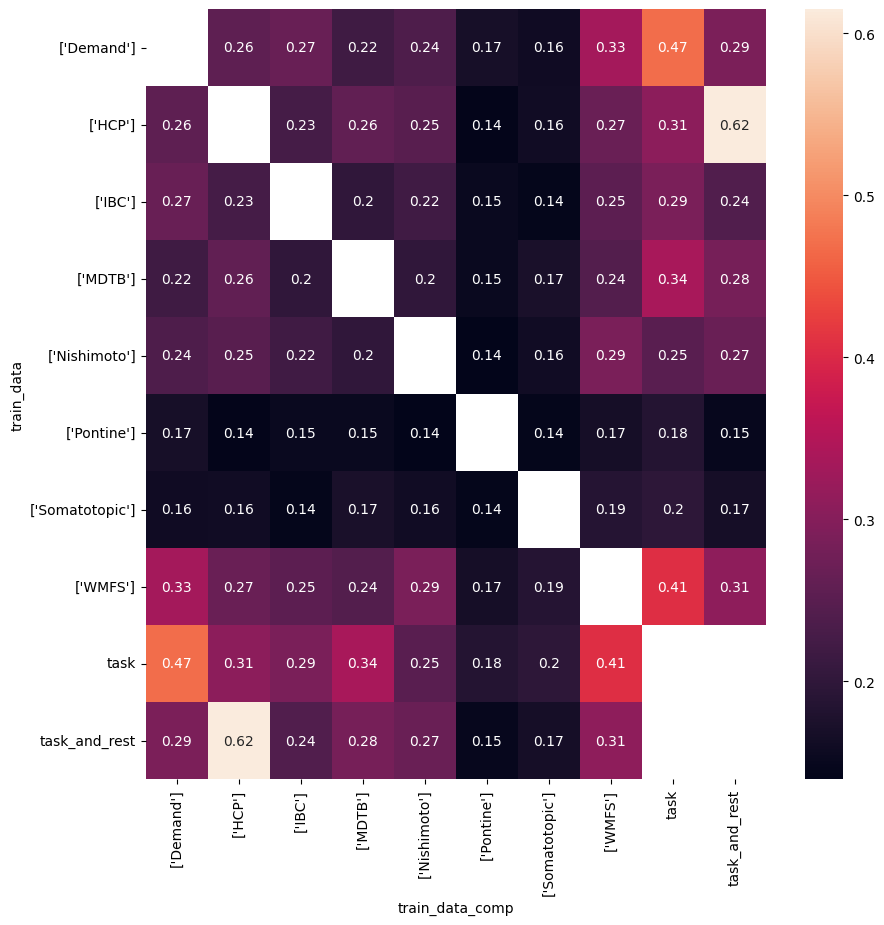

In [330]:
figsize = (10, 10)

plt.figure(figsize=figsize)
sb.heatmap(ARI_wide, annot=True)
